<a href="https://colab.research.google.com/github/gustavo21math/PyTorch/blob/main/Section_1__PyTorch_Fudamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://miro.medium.com/v2/resize:fit:512/1*IMGOKBIN8qkOBt5CH55NSw.png)

# Section 1: PyTorch Fundamentals

## Introduction to PyTorch

### What is PyTorch?

PyTorch is an open-source machine learning library based on the Torch library. Developed by Facebook's AI Research lab (FAIR), it provides a flexible and dynamic platform for building deep learning models. PyTorch's primary strength is its dynamic computation graph, which allows for more intuitive and flexible model building.

Key Features:

- Dynamic Computational Graph: Enables on-the-fly changes to the graph, making debugging and experimenting easier.
Pythonic Nature: Seamlessly integrates with Python, making it easy for Python developers to use.
- Tensor Computation (like NumPy): Tensors in PyTorch are similar to NumPy arrays but with additional features for GPU acceleration.
- Automatic Differentiation: PyTorch’s autograd module provides automatic differentiation for all operations on Tensors.


### Example of Neural Network without PyTorch

```python
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training data (XOR problem)
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

# Target output
targets = np.array([[0], [1], [1], [0]])

# Initialize weights randomly
input_layer_neurons = inputs.shape[1]
hidden_layer_neurons = 2
output_layer_neurons = 1

# Weights and biases
wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
bh = np.random.uniform(size=(1, hidden_layer_neurons))
wo = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
bo = np.random.uniform(size=(1, output_layer_neurons))

# Training the neural network
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, wh) + bh
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, wo) + bo
    predicted_output = sigmoid(output_layer_input)

    # Calculate error
    error = targets - predicted_output

    # Backward pass
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(wo.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    wo += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bo += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    wh += inputs.T.dot(d_hidden_layer) * learning_rate
    bh += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

print("Final predicted output:")
print(predicted_output)

```

### Example with PyTorch
```python
import torch
import torch.nn as nn
import torch.optim as optim

# Training data (XOR problem)
inputs = torch.tensor([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]], dtype=torch.float32)

# Target output
targets = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Input layer to hidden layer
        self.fc2 = nn.Linear(2, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Instantiate the model, define loss function and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the neural network
epochs = 10000
for epoch in range(epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Final predicted output:")
print(outputs.detach().numpy())

```



## Who Uses PyTorch?

### Industry Adoption:

Industry Adoption:
PyTorch is widely used by leading companies and research institutions for a variety of applications:

- Facebook: Uses PyTorch for various AI research and production applications.
- Tesla: Utilizes PyTorch for autonomous driving research and development.
- Microsoft: Employs PyTorch for its AI research initiatives and Azure Machine Learning.
- OpenAI: Uses PyTorch for developing advanced AI models.
- Uber: Leverages PyTorch for various machine learning tasks including autonomous driving.

### Use Cases:

- Research: PyTorch’s flexibility makes it ideal for research and experimentation. Many research papers and state-of-the-art models are developed using PyTorch.

![](https://pytorch.org/assets/images/sketch_animator.png)

- Industry: Companies use PyTorch to develop and deploy machine learning models in production due to its performance and ease of use.

![](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjs0olgHSMhCA-jprBJn9vCF895y36tD_5a8IQNNPjvzP7bQzPBgS6tevd4DEdnhT8IJn4iRXDs9vVPqMFwMLTmZdULvWHFtp4q00gs2F3E5WA5lhHx_gjlk3UQmU1oqe-1dGZkloTabbFQ/s1600/run_ssd_example_output1.jpg)

## Why PyTorch?
### Advantages:

- Ease of Use: PyTorch is designed to be intuitive and easy to learn, especially for those familiar with Python and NumPy.
- Flexibility: The dynamic computation graph allows for flexible model design and debugging.
- Community and Ecosystem: A large and active community means more tutorials, tools, and libraries are available, making it easier to get support and find resources.
- Performance: PyTorch supports efficient computation on GPUs, which is crucial for training large models quickly.



# References/Links:

- PyTorch home page: https://pytorch.org/

## Installation and Setup

### 1. Installing PyTorch

**Overview:**
PyTorch can be installed on various platforms, including Windows, macOS, and Linux. This section provides detailed instructions for installing PyTorch using pip, conda, and setting up on Google Colab.

**A. Installing PyTorch using pip**

1. **Windows/Mac/Linux:**
   ```bash
   pip install torch torchvision torchaudio
   ```
   - Verify the installation:
     ```python
     import torch
     print(torch.__version__)
     ```

**B. Installing PyTorch using Conda**

1. **Windows/Mac/Linux:**
   ```bash
   conda install pytorch torchvision torchaudio -c pytorch
   ```
   - Verify the installation:
     ```python
     import torch
     print(torch.__version__)
     ```

**C. Installing PyTorch on Google Colab**

Google Colab provides an excellent environment for running PyTorch without any installation hassles. PyTorch is pre-installed in Google Colab.

1. **Verify the installation:**
   ```python
   import torch
   print(torch.__version__)
   ```

**References:**
- [PyTorch Installation Guide](https://pytorch.org/get-started/locally/)

### 2. Setting up the Development Environment

**Overview:**
Setting up a proper development environment is crucial for efficient machine learning workflows. We will cover setting up environments on Google Colab, Jupyter Notebook with Anaconda, and local IDEs like VS Code.

**A. Setting up on Google Colab**

1. **Accessing Google Colab:**
   - Go to [Google Colab](https://colab.research.google.com/)
   - Sign in with your Google account.
   - Create a new notebook by clicking on "File" -> "New Notebook".

2. **Using PyTorch in Colab:**
   - PyTorch is pre-installed. Simply verify the installation with:
     ```python
     import torch
     print(torch.__version__)
     ```

**B. Setting up Jupyter Notebook with Anaconda**

1. **Installing Anaconda:**
   - Download and install Anaconda from [Anaconda's official website](https://www.anaconda.com/products/distribution).
   - Create a new environment:
     ```bash
     conda create -n pytorch_env python=3.8
     conda activate pytorch_env
     ```

2. **Installing Jupyter Notebook:**
   ```bash
   conda install jupyter
   ```

3. **Installing PyTorch:**
   ```bash
   conda install pytorch torchvision torchaudio -c pytorch
   ```

4. **Launching Jupyter Notebook:**
   ```bash
   jupyter notebook
   ```
   - Create a new Python notebook and verify PyTorch installation:
     ```python
     import torch
     print(torch.__version__)
     ```

**C. Setting up in Visual Studio Code (VS Code)**

1. **Installing VS Code:**
   - Download and install Visual Studio Code from [VS Code's official website](https://code.visualstudio.com/).

2. **Setting up Python Extension:**
   - Install the Python extension for VS Code.

3. **Creating a Virtual Environment:**
   ```bash
   python -m venv pytorch_env
   pytorch_env\Scripts\activate  # For Windows
   source pytorch_env/bin/activate  # For macOS/Linux
   ```

4. **Installing PyTorch:**
   ```bash
   pip install torch torchvision torchaudio
   ```

5. **Running PyTorch in VS Code:**
   - Open VS Code and select the created virtual environment as the interpreter.
   - Create a new Python file and verify the PyTorch installation:
     ```python
     import torch
     print(torch.__version__)
     ```





In [2]:
import torch

print(torch.__version__)

2.9.1



## Lecture 2: Tensors in PyTorch

### 2.1 Introduction to Tensors

Tensors are the fundamental building blocks of machine learning models in PyTorch. They are multidimensional arrays that can store data in various forms, such as scalars, vectors, matrices, and higher-dimensional arrays. Tensors enable efficient computation and are essential for performing mathematical operations and training deep learning models.

### 2.2 Scalars

A scalar is a single numerical value. In tensor terminology, a scalar is a zero-dimensional tensor.






**Explanation:**
- `torch.tensor(5)`: Creates a tensor with a single value.
- `item()`: Retrieves the Python number from the scalar tensor.
- `shape`: Shows the shape of the tensor.
- `ndim`: Returns the number of dimensions of the tensor.



### 2.3 Vectors

A vector is a one-dimensional tensor that can hold a sequence of numerical values.




**Explanation:**
- `torch.tensor([1, 2, 3, 4])`: Creates a tensor with a list of values.
- `shape`: Returns the shape of the vector.
- `ndim`: Returns the number of dimensions of the vector.


### 2.4 Matrices

A matrix is a two-dimensional tensor that holds data in a tabular format with rows and columns.





**Explanation:**
- `torch.tensor([[1, 2, 3], [4, 5, 6]])`: Creates a 2D tensor with rows and columns.
- `shape`: Returns the shape of the matrix.
- `ndim`: Returns the number of dimensions of the matrix.


### 2.5 Higher-Dimensional Tensors

Higher-dimensional tensors can have three or more dimensions, used for more complex data representations such as images, videos, and batches of data.






**Explanation:**
- `torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])`: Creates a 3D tensor.
- `shape`: Returns the shape of the tensor.
- `ndim`: Returns the number of dimensions of the tensor.



### 2.6 Shape, ndim, and size

Understanding the shape, number of dimensions (ndim), and size of tensors is crucial for manipulating and using them effectively.




**Explanation:**
- `shape`: Returns a tuple representing the dimensions of the tensor.
- `ndim`: Returns the number of dimensions of the tensor.
- `size()`: Returns a tuple representing the size of each dimension of the tensor.


### 2.7 Resizing and Indexing

Resizing (reshaping) and indexing tensors are common operations in PyTorch.




**Explanation:**
- `view()`: Reshapes the tensor to the specified dimensions.
- Indexing: Accesses specific elements or slices of the tensor.



### 2.8 Creating Tensors with Random, Zeros, and Ones





**Explanation:**
- `torch.rand((2, 2))`: Creates a tensor with random values between 0 and 1.
- `torch.zeros((2, 2))`: Creates a tensor filled with zeros.
- `torch.ones((2, 2))`: Creates a tensor filled with ones.


# Lesson 3: Tensor Operations

### 3.1 Common Arguments in Tensor Creation





**Explanation:**
- `dtype`: Specifies the data type of the tensor elements.
- `requires_grad`: Indicates if PyTorch should calculate gradients with respect to this tensor.
- `device`: Specifies whether the tensor is created on the CPU or GPU.

### 3.2 Tensor Operations



**Explanation:**
- Basic operations such as addition, multiplication, and dot product can be performed directly on tensors.
- `torch.matmul()`: Performs matrix multiplication.


  

## Lesson 4: Building Your First PyTorch Model - Linear Regression

### Introduction to PyTorch Models
In PyTorch, models are defined using the `nn.Module` class. This class provides the necessary structure to build neural networks and encapsulate learnable parameters. When you create a model, you typically inherit from `nn.Module` and define the layers and forward pass within your model class.

### Building Blocks of a PyTorch Model
A PyTorch model typically consists of:

1. **`__init__` Method**: This is where you define the layers of your model. Each layer is defined as an instance variable.
2. **`forward` Method**: This method defines the forward pass of the model, which specifies how the input data flows through the layers to produce the output.

### Creating a Toy Dataset
To illustrate linear regression, we'll create a simple dataset where the relationship between `X` and `y` is defined by a linear equation with some added noise. We'll split this dataset into training and testing sets.




In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create toy dataset
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + torch.randn(X.size())

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2, random_state=42)

In [ ]:
# Convert back to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

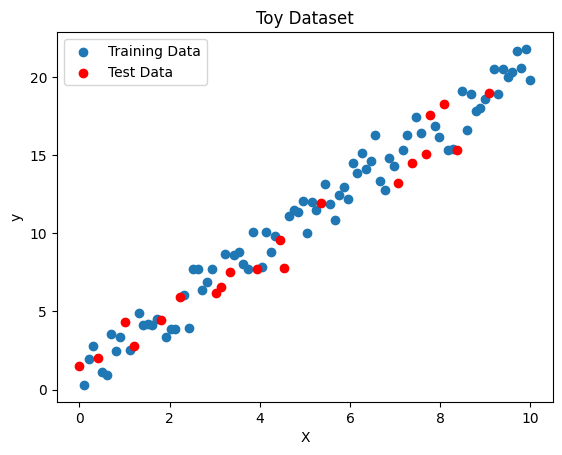

In [ ]:
# Plot the training and test sets
plt.scatter(X_train.numpy(), y_train.numpy(), label='Training Data')
plt.scatter(X_test.numpy(), y_test.numpy(), label='Test Data', color='red')
plt.title('Toy Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Convert back to tensors


In [ ]:
# Plot the training and test sets


### Implement the first model using PyTorch - Linear Regression

#### Implementing Linear Regression Model
Now, let's define a simple linear regression model. In this model, we inherit from nn.Module and define a single linear layer in the __init__ method. The forward method specifies the forward pass, which simply applies the linear layer to the input data.

### Making predictions with the untrained model

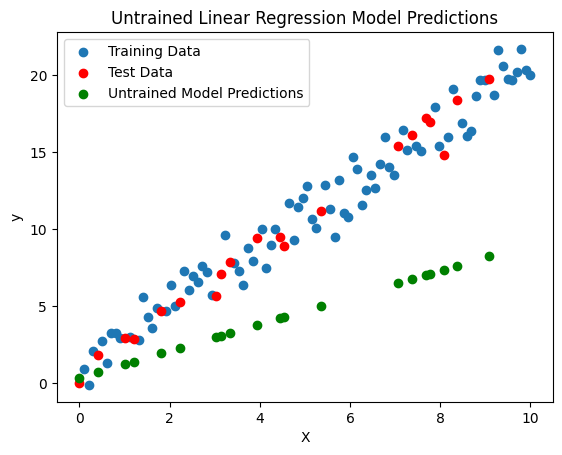

In [ ]:
# Make predictions with the untrained model
with torch.no_grad():
    untrained_predictions = lr_model(X_test)

# Plot the training data and test data
plt.scatter(X_train.numpy(), y_train.numpy(), label='Training Data')
plt.scatter(X_test.numpy(), y_test.numpy(), label='Test Data', color='red')

# Plot the untrained model predictions
plt.scatter(X_test.numpy(), untrained_predictions.numpy(), label='Untrained Model Predictions', color='green')

plt.title('Untrained Linear Regression Model Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Lesson 5: Optimizers and Loss Functions

### Introduction to Loss Functions
Loss functions are a crucial component in machine learning models. They measure how well the model's predictions match the actual data. The goal during training is to minimize this loss. Common loss functions include Mean Squared Error (MSE) for regression tasks and Cross-Entropy Loss for classification tasks.

#### Mean Squared Error (MSE)
MSE measures the average squared difference between predicted values and actual values. It is defined as:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$


### Introduction to Optimizers
Optimizers are algorithms that adjust the model parameters to minimize the loss function. They update the weights of the model based on the gradients computed during backpropagation. Common optimizers include Stochastic Gradient Descent (SGD) and Adam.

#### Stochastic Gradient Descent (SGD)
SGD updates the model parameters by computing the gradient of the loss with respect to each parameter and moving the parameters in the direction of the negative gradient.

Read more about optimizers:

- https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/
- https://pytorch.org/docs/stable/optim.html

### Training Loops and Epochs
The training loop is the process of repeatedly passing the training data through the model to update the model parameters. Each pass through the entire training dataset is called an epoch. Here are the steps involved in a typical training loop:

1. Forward Pass: Compute the predictions.
2. Compute Loss: Calculate the loss between predictions and actual values.
3. Backward Pass: Compute the gradients.
4. Update Parameters: Adjust the model parameters using the optimizer.

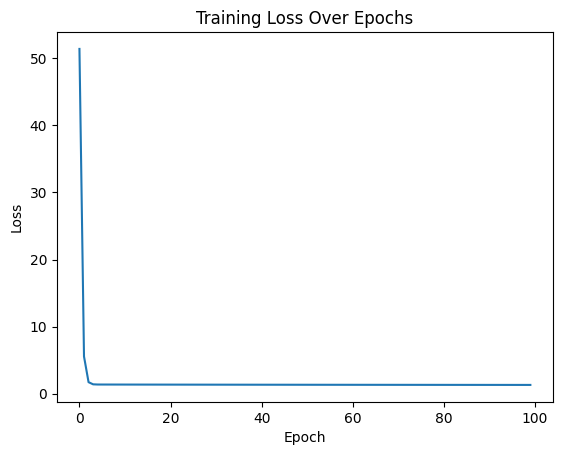

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

### Final evaluation

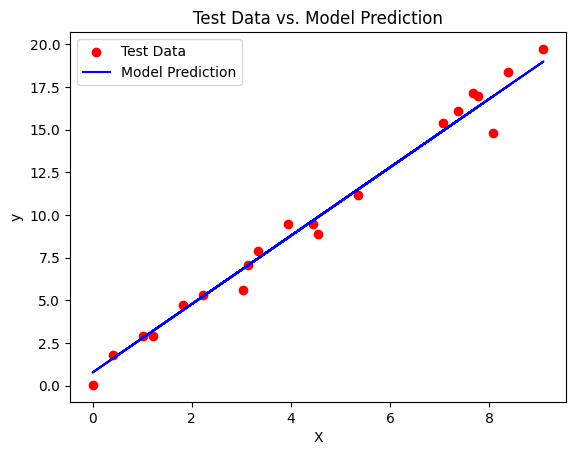

In [ ]:
# Plot the test data and predictions
plt.scatter(X_test.numpy(), y_test.numpy(), label='Test Data', color='red')
plt.plot(X_test.numpy(), predictions.numpy(), label='Model Prediction', color='blue')

plt.title('Test Data vs. Model Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Lesson 6: Writing Your First Feedforward Neural Network (FFNN)

### Introduction to Feedforward Neural Networks
A Feedforward Neural Network (FFNN) is one of the simplest types of artificial neural networks. In an FFNN, the data flows in one direction—from input to output—through fully connected layers. Each layer consists of a set of neurons, and each neuron applies a linear transformation followed by a non-linear activation function.

### Preparing the Boston Housing Dataset
We will use the Boston Housing dataset for our regression task. This dataset contains information about houses in Boston and their prices.

In [ ]:
from sklearn.datasets import fetch_openml
boston = fetch_openml("boston")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = boston.data, boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


### Implementing the FFNN Model

We will define a simple FFNN with one hidden layer. This model will have an input layer, a hidden layer with ReLU activation, and an output layer.

![](https://miro.medium.com/v2/1*Ne7jPeR6Vrl1f9d7pLLG8Q.jpeg)




### Activation Functions and Their Roles

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns. Without activation functions, the neural network would be equivalent to a linear regression model.

**ReLU**

<img src="https://cdn.prod.website-files.com/5d7b77b063a9066d83e1209c/60be1b236a3731df9b1d43c9_math-20210607%20(11).png" alt="image" width="300" height="auto">

 **Sigmoid:**

![](https://www.gstatic.com/education/formulas2/553212783/en/sigmoid_function.svg)
  

In [ ]:
num_epochs = 100
loss_values = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_train)  # Perform the forward pass
    loss = criterion(outputs, y_train)  # Compute the loss
    loss.backward()  # Perform the backward pass (compute gradients)
    optimizer.step()  # Update the weights
    loss_values.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 27.4893
Epoch [20/100], Loss: 18.3145
Epoch [30/100], Loss: 15.2254
Epoch [40/100], Loss: 13.5746
Epoch [50/100], Loss: 12.5096
Epoch [60/100], Loss: 11.7514
Epoch [70/100], Loss: 11.1887
Epoch [80/100], Loss: 10.7539
Epoch [90/100], Loss: 10.3969
Epoch [100/100], Loss: 10.1118


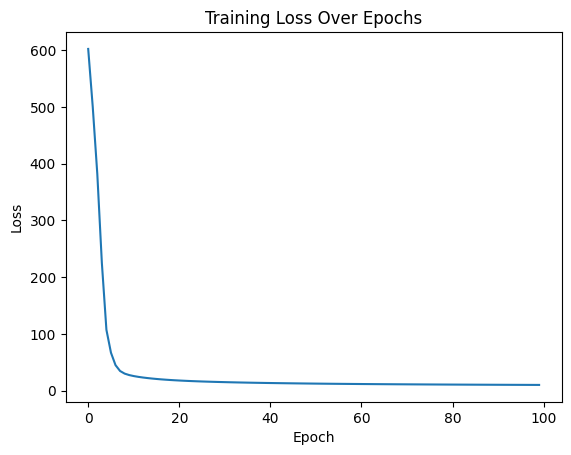

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()